In [2]:
# !python3 -m pip install praat-textgrids

  Running setup.py bdist_wheel for praat-textgrids ... done
  Stored in directory: /home/devanshb_it_17/.cache/pip/wheels/96/d1/17/9af523668ff127df07805e3790c2027d8ace0a22c633c55699
Successfully built praat-textgrids


In [17]:
import glob
txtFiles = glob.glob("/home/devanshb_it_17/Downloads/pretrain/*/*.txt")

In [21]:
import textgrids
import os
WordTimeStamps = {}
AllOverlaps = []
for path in txtFiles:
    data = open(path, "r")
    content = data.readlines()
    startind = (content.index("WORD START END ASDSCORE\n"))
    
    thisWord = {}
    for word in content[startind+1:]:
        tokens = word.split(" ")
        word_text = tokens[0]
        thisWord[word_text] = [float(tokens[1]), float(tokens[2])]
    
    
    data.close()
    pathTokens = path.split('/')
    fileName = pathTokens[-1]
    pathTokens[-1] = pathTokens[-2]+pathTokens[-1]
    pathTokens[-3] = "outPretrain"
    path = "/".join(pathTokens)
    txtGridPath = path.replace(".txt", ".TextGrid")
    
    if not (os.path.isfile(txtGridPath)):
        continue
    tg = textgrids.TextGrid(txtGridPath)
    thisWordTG = {}
    overlaps = []
    for syll in tg['words']:
        # Convert Praat to Unicode in the label
        label = syll.text.transcode()
        # Print label and syllable duration, CSV-like
        GTruth = thisWord.get(label.upper(), "notExists")
        if GTruth == "notExists":
            continue
        
        thisWordTG[label.upper()] = [float(syll.xmin), float(syll.xmax)]
        overlaps.append(GetOverlap(thisWordTG[label.upper()], thisWord[label.upper()]))
    WordTimeStamps[path] = {
        "Words_txt": thisWord,
        "Words_txtgrid": thisWordTG, 
        "overlaps": overlaps
    }
    AllOverlaps.extend(overlaps)
    

In [3]:
def GetOverlap(a, b):
    overlaps = (a[0] <= b[0] - 0.15 <= a[1] or b[0] - 0.15 <= a[0] <= b[1] + 0.15)
    if (overlaps == False):
        return 0
    if a[1] > (b[1] + 0.15):
        return ((b[1] + 0.15 - max(a[0], b[0] - 0.15))/ (b[1] + 0.30 - b[0]))
    return ((a[1] - max(a[0], b[0] - 0.15))/ (b[1] + 0.30 - b[0]))
#     return (a[1] - a[0]) / (b[1] - b[0])
# WordTimeStamps

In [ ]:
def GetOverlap(a, b):
    overlaps = (a[0] <= b[0] <= a[1] or b[0] <= a[0] <= b[1])
#     if (overlaps == False):
#         return 0
    if a[1] > b[1]:
        return ((b[1] - max(a[0], b[0]))/ (b[1] - b[0]))
    return ((a[1] - max(a[0], b[0]))/ (b[1] - b[0]))
#     return (a[1] - a[0]) / (b[1] - b[0])
# WordTimeStamps

In [22]:
def Average(lst): 
    return sum(lst) / len(lst) 


print(Average(AllOverlaps))

print(Average(list(filter(lambda x: x != 0, AllOverlaps))))

0.3560564445006163
0.4665603067123601


In [13]:
AllOverlaps[1]

IndexError: list index out of range

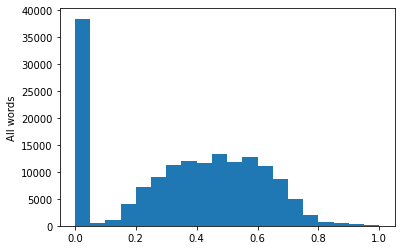

Average Overlap = 0.3560564445006163


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(AllOverlaps, bins=20)
plt.ylabel('All words')
plt.show()

print("Average Overlap = " + str(Average(AllOverlaps)))

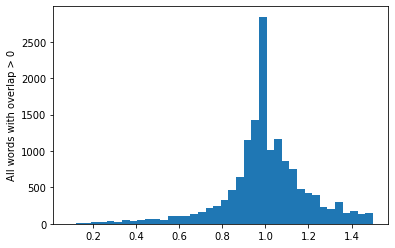

Average Overlap = 0.9995467587681875


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(list(filter(lambda x: x <= 1.5, AllOverlaps)), bins=40)
plt.ylabel('All words with overlap > 0')
plt.show()

print("Average Overlap = " + str(Average(list(filter(lambda x: x <= 1.5, AllOverlaps)))))